# Двухфазная фильтрация

## Несжимаемая жидкость

### Уравнения

**Уравнение неразрывности** в МСС:

$$
\frac{\partial r_{\alpha} }{\partial t} + \nabla \cdot \left( r_{\alpha} \vec{v}_{\alpha} \right) = 0
$$

где $r_{\alpha}$ - осредненная по объему плотность жидкости $\alpha$, \
$\hspace{5.5mm}\vec{v}_{\alpha}$ - осредненный вектор скорости жидкости $\alpha$.

$$
r_{\alpha} = \rho_{\alpha} S_{\alpha} \phi 
$$

где $S_{\alpha}$ - насыщенность пористой среды жидкостью $\alpha$, \
$\hspace{5.5mm} \phi$ - пористость среды, \
$\hspace{5.5mm} \rho_{\alpha}$ - истинная плотность жидкости $\alpha$.

$$
S_{\alpha} = \frac{V_{\alpha}}{V_{void}} \hspace{1cm} \phi = \frac{V_{void} }{V}
$$

где $V_{\alpha}$ - объем занятый жидкостью $\alpha$, \
$\hspace{5.5mm} V_{void}$ - объем пустот в пористой среде, \
$\hspace{5.5mm} V$ - суммарный объем пористой среды с насыщаемыми жидкостями.

Пусть жидкости две, где $S$ - насыщенность пористой среды смачиваемой жидкостью, тогда $(1 - S)$ - насыщенность несмачиваемой жидкостью, а уравнение неразрывности примет вид:

$$
\frac{\partial ( \rho_{1} S \phi ) }{\partial t} + \nabla \cdot \left( \rho_{1} S \phi \vec{v}_{1} \right) = 0
$$
$$
\frac{\partial \left( \rho_{2} (1 - S) \phi \right) }{\partial t} + \nabla \cdot \left( \rho_{2} (1 - S) \phi \vec{v}_{2} \right) = 0
$$

Заметим, что $\vec{W}_{\alpha} = S_{\alpha} \phi \vec{v}_{\alpha}$, - вектор скорости фильтрации жидкости $\alpha$, тогда:

$$
\frac{\partial ( \rho_{1} S \phi ) }{\partial t} + \nabla \cdot \left( \rho_{1} \vec{W}_{1} \right) = 0
$$
$$
\frac{\partial \left( \rho_{2} (1 - S) \phi \right) }{\partial t} + \nabla \cdot \left( \rho_{2} \vec{W}_{2} \right) = 0
$$

Пусть пористая среда и жидкости несжимаемы ($\rho_{\alpha} = $ const, $\phi =$ const), тогда уравнение примет вид:

$$
\phi \frac{\partial S }{\partial t} + \nabla \cdot \vec{W}_{1} = 0
$$
$$
- \phi \frac{\partial S }{\partial t} + \nabla \cdot  \vec{W}_{2} = 0
$$

Просуммировав уравнения, получим:

$$
\nabla \cdot \left( \vec{W}_{1} + \vec{W}_{2} \right)= 0
$$

**Обобщенный закон Дарси**:

$$
\vec{W}_{\alpha} = - k \frac{f_{\alpha}(S_{\alpha})}{\mu_{\alpha}} \nabla P
$$

где $S_{\alpha}$ - насыщенность пористой среды жидкостью $\alpha$, \
$\hspace{5.5mm} \phi$ - пористость среды, \
$\hspace{5.5mm} \rho_{\alpha}$ - истинная плотность жидкости $\alpha$.

**В одномерном случае**

$$
\frac{\partial}{\partial x} \left( W_1 + W_2 \right) = 0
$$

Подставляя закон Дарси, а также пренебрегая капиллярным давлением, получим:

$$
\frac{\partial}{\partial x} \left[ \frac{\partial P}{\partial x} \left( \frac{f_1(S)}{\mu_1} + \frac{f_2(S)}{\mu_2} \right) \right] = 0
$$

$$
\frac{\partial^2 P}{\partial x^2} \left( \frac{f_1(S)}{\mu_1} + \frac{f_2(S)}{\mu_2} \right) + \frac{\partial P}{\partial x} \frac{\partial}{\partial x}\left(  \frac{f_1(S)}{\mu_1} + \frac{f_2(S)}{\mu_2} \right) = 0
$$

Пусть $\alpha = \frac{f_1(S)}{\mu_1} + \frac{f_2(S)}{\mu_2}$, а $\beta = \frac{\partial}{\partial x}\left(  \frac{f_1(S)}{\mu_1} + \frac{f_2(S)}{\mu_2} \right)$, тогда:

$$
\frac{\partial^2 P}{\partial x^2} \alpha + \frac{\partial P}{\partial x} \beta = 0
$$

Применим **метод конечных разностей**:

$$
\frac{\partial^2 P}{\partial x^2} = \frac{P_{i-1} - 2 P_i + P_{i+1} }{h^2} \hspace{1cm}
\frac{\partial P}{\partial x} = \frac{P_i - P_{i-1} }{h}
$$

Тогда уравнение примет вид:

$$
P_{i-1} (\alpha - \beta) - P_i (2 \alpha - \beta) + P_{i+1} \alpha = 0
$$

Решая данное уравнение, получим поле давления на $n+1$ слое. Теперь необходимо получить поле насыщенности. Возьмем уравнение неразрывности для смачиваемого флюида, в одномерном случае получим:

$$
\phi \frac{\partial S }{\partial t} + \frac{\partial W_{1}}{\partial x} = 0
$$

Применим **метод конечных разностей** и **противопоточную схему**:

$$
\frac{\partial S}{\partial t} = \frac{S_i^{n+1} - S_i^n}{\tau} 
\hspace{1cm}
\frac{\partial W_1}{\partial x} = \frac{(W_{1})_i^n - (W_{1})_{i-1}^n }{h}
\hspace{1cm}
(W_{1})_i^{n+1} = - k \frac{f_1(S_i^{n})}{\mu_1} \frac{P_i^{n+1} - P_{i-1}^{n+1} }{h}
$$

Тогда поле насыщенности можно получить по следующей явной схеме:

$$
S_i^{n+1} = S_i^n - \frac{\tau}{\phi h} \left( (W_{1})_i^{n+1} - (W_{1})_{i-1}^{n+1} \right)
$$

Отсюда число Куранта

$$
CFL = \frac{\tau}{\phi h}
$$

### Численное решение

![Upwind Scheme](./source/Upwind%20scheme.jpg)

In [103]:
'''
If you are using Google Colab, uncomment the next line to download `SLAU.py`
You can open and change downloaded `.py` files in Colab using the "Files" sidebar on the left.
'''
# !wget https://raw.githubusercontent.com/lnrsmglln/1D_filtration/SLAU.py 

'\nIf you are using Google Colab, uncomment the next line to download `SLAU.py`\nYou can open and change downloaded `.py` files in Colab using the "Files" sidebar on the left.\n'

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import SLAU

%load_ext autoreload
%autoreload 2

def k1(S):
    return (S - 1)**2

def k2(S):
    return S*S

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [160]:
# Хар-ки породы
k = 1 * 10**(-12)
porosity = 0.2

# Флюидов
mu1 = 2 * 10**(-3)
mu2 = 5 * 10**(-3)

# Длина расчетной области
L = 5
T = 2000

# Шаги сетки
h = 0.1
tau = 0.1

# Граничные условия (начало и конец расчетной области)
P_L = 2 * 10**6
P_R = 1 * 10**6
S_L = 0.2
# W1_L = h / 1000

# Начальные условия
P_0 = P_R
S_0 = S_L
S_med = 0.99

print(f"Число Куранта CFL = {round(tau / porosity / h, 3)}")

Число Куранта CFL = 5.0


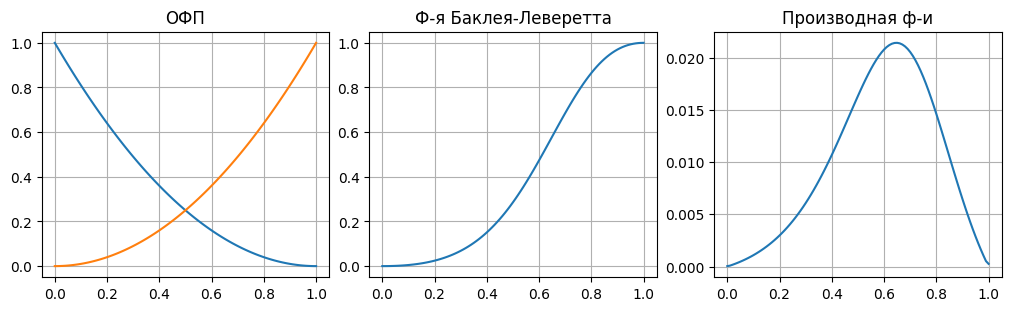

In [161]:
# Графики Баклея-Леверетта
fig, axs = plt.subplots(1, 3, figsize=(10, 3), layout='constrained')

s = np.arange(0, 1.01, 0.01)
mu = mu1 / mu2
f_s = mu * np.array([k2(i) for i in s]) / (mu * np.array([k2(i) for i in s]) + np.array([k1(i) for i in s]))

axs[0].set_title("ОФП")
axs[0].grid()
axs[0].plot(s, [k1(i) for i in s], s, [k2(i) for i in s])


axs[1].plot(s, f_s)
axs[1].grid()
axs[1].set_title("Ф-я Баклея-Леверетта")

axs[2].plot(s, np.gradient(f_s))
axs[2].grid()
axs[2].set_title("Производная ф-и")

plt.show()

In [162]:
x = np.arange(0, L+h, h)
t = np.arange(0, T+tau, tau)

Nl = len(x)
Nt = len(t)

P = np.zeros([Nt, Nl])
P[0, :] = P_0
P[:, 0] = P_L
P[:, -1] = P_R

S = np.zeros([Nt, Nl])
S[0, :] = S_0
S[:, 0] = S_L
S[0, (Nl // 5 * 2) : (Nl // 5 * 3)] = S_med
# S[:, -1] = Sn

W1 = np.zeros([Nt, Nl-1])
# W1[:, 0] = W1_L

# Кол-во неизвестных
Nx = Nl - 2 

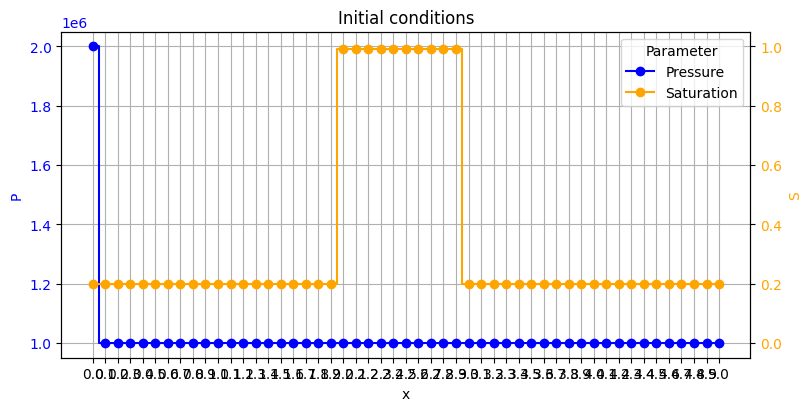

In [163]:
# График начальных условий
fig, ax1 = plt.subplots(figsize=(8, 4), layout='constrained')
ax1.set_xlabel("x")
ax1.set_ylabel("P", color="blue")
plot_1 = ax1.step(x, P[0], where="mid", color="blue", label="Pressure", marker="o")

ax1.tick_params(axis ='y', labelcolor = 'blue') 

ax2 = ax1.twinx()
ax2.set_ylabel("S", color="orange")
plot_2 = ax2.step(x, S[0], where="mid", color="orange", label="Saturation", marker="o")
ax2.tick_params(axis ='y', labelcolor = 'orange')
ax2.set_ylim([-0.05, 1.05])

lns = plot_1 + plot_2
plt.legend(lns, [l.get_label() for l in lns], title="Parameter", loc=0)
ax1.set_title("Initial conditions")

ax1.grid()
ax1.set_xticks(x)
plt.show()

## IMPES scheme

In [164]:
for n in range(1, Nt):
    # Расчет неявным методов давления на n-м слое по насыщенности на (n-1)-м слое
    a = np.zeros(Nx, dtype=float)
    b = np.zeros(Nx, dtype=float)
    c = np.zeros(Nx, dtype=float)
    f = np.zeros(Nx, dtype=float)
    j = 0
    for i in range(1, Nl-1):
        alpha = k1(S[n-1, i]) / mu1 + k2(S[n-1, i]) / mu2

        beta = (k1(S[n-1, i]) - k1(S[n-1, i-1])) / mu1 + \
        (k2(S[n-1, i]) - k2(S[n-1, i-1])) / mu2

        a[j] = alpha - beta
        c[j] = 2 * alpha - beta
        b[j] = alpha
        f[j] = 0

        j += 1
    
    # f[0] = 150
    # f[-1] = -150
    P[n, 1:-1] = SLAU.tridiagonal_1D_solver(a, b, c, f, P[n, 0], P[n, -1])

    # Расчет явным методом насыщенности на n-м слое по давлению на n-м слое
    # W1[n, 0] = - k * k1(S[n-1, 0]) / mu1 / h * (P[n, 1] - P[n, 0])
    for i in range(1, Nl):
        # upwind scheme
        if i != Nl - 1:
            Wplushalf = - k * k1(S[n-1, i]) / mu1 / h * (P[n, i+1] - P[n, i])
        Wminushalf = - k * k1(S[n-1, i-1]) / mu1 / h * (P[n, i] - P[n, i-1])
        W1[n, i-1] = Wminushalf
        # explicit saturation calc
        S[n, i] = S[n-1, i] + tau / h / porosity * (Wplushalf - Wminushalf)


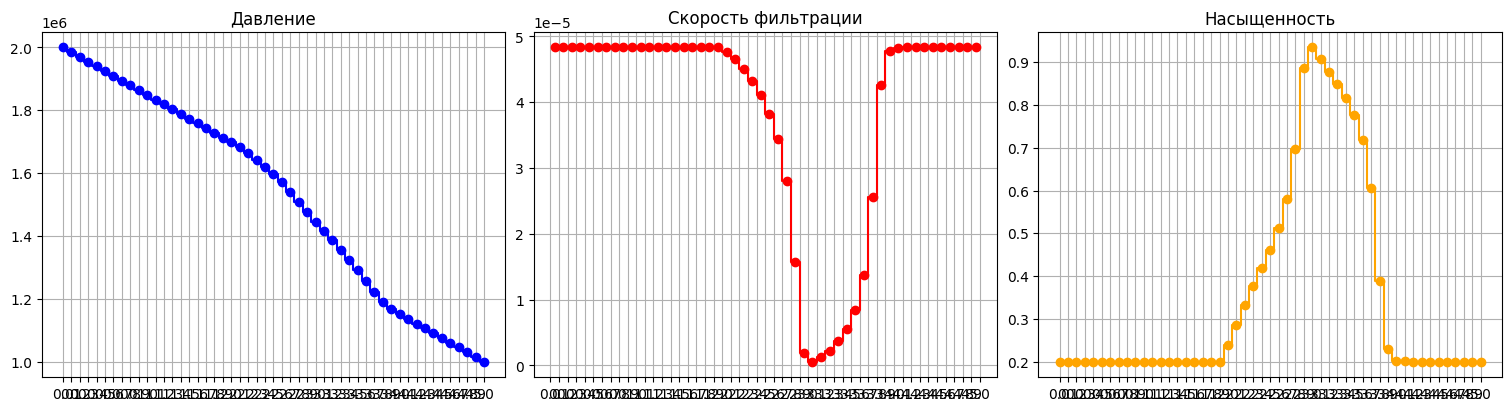

In [167]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), layout='constrained')
i = -1
axs[0].step(x, P[i], where="mid", marker="o", color="blue")
axs[0].set_title("Давление")
axs[1].step((x+h/2)[:-1], W1[i], where="mid", marker="o", color="red")
axs[1].set_title("Скорость фильтрации")
axs[2].step(x, S[i], where="mid", marker="o", color="orange")
axs[2].set_title("Насыщенность")
for i in axs:
    i.grid()
    i.set_xticks(x)
plt.show()

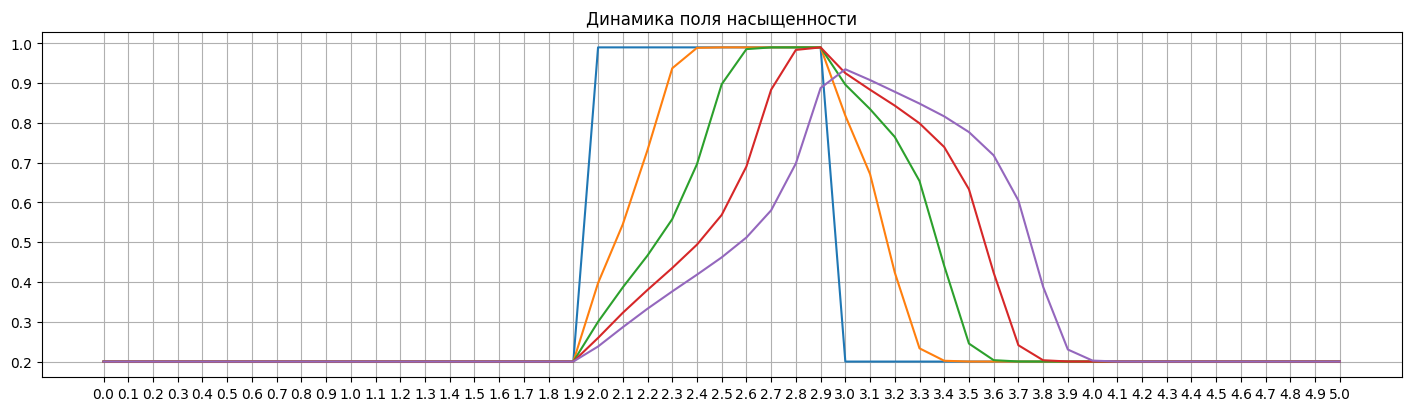

In [175]:
# n - кол-во кривых на графике
n = 5

fig, ax = plt.subplots(figsize=(14, 4), layout='constrained')
j = 0
for s in S:
    if j % (T // tau // (n -1)) == 0:
        ax.plot(x, s)
    j += 1
plt.title("Динамика поля насыщенности")
ax.grid()
ax.set_xticks(x)
plt.show()